In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [101]:
from tensorflow.keras import layers

embedding_layer = layers.Embedding(10000, 12)

In [106]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_token = 20
sentences = ['good, good, good, good, good, good.', 'bad, bad, bad, bad.']
onehot_doc = [one_hot(words, 10000) for words in sentences]
padded_doc = pad_sequences(onehot_doc, padding='post', maxlen=max_token) 
print(padded_doc)

[[8510 8510 8510 8510 8510 8510    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 351  351  351  351    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]


In [107]:
result = embedding_layer([padded_doc[0]])
print(embedding_layer(padded_doc[1]))
result

tf.Tensor(
[[-0.04718008  0.02061793  0.04944015 -0.00976275  0.01708926  0.01455525
  -0.02224588  0.03275308 -0.03622893 -0.02034378  0.00332244  0.01385231]
 [-0.04718008  0.02061793  0.04944015 -0.00976275  0.01708926  0.01455525
  -0.02224588  0.03275308 -0.03622893 -0.02034378  0.00332244  0.01385231]
 [-0.04718008  0.02061793  0.04944015 -0.00976275  0.01708926  0.01455525
  -0.02224588  0.03275308 -0.03622893 -0.02034378  0.00332244  0.01385231]
 [-0.04718008  0.02061793  0.04944015 -0.00976275  0.01708926  0.01455525
  -0.02224588  0.03275308 -0.03622893 -0.02034378  0.00332244  0.01385231]
 [ 0.03725061 -0.0207202   0.04307157  0.01822284 -0.01160808  0.04317104
  -0.00441823 -0.01572945 -0.02374216 -0.03544183  0.02747141 -0.01246964]
 [ 0.03725061 -0.0207202   0.04307157  0.01822284 -0.01160808  0.04317104
  -0.00441823 -0.01572945 -0.02374216 -0.03544183  0.02747141 -0.01246964]
 [ 0.03725061 -0.0207202   0.04307157  0.01822284 -0.01160808  0.04317104
  -0.00441823 -0.0157

<tf.Tensor: shape=(20, 12), dtype=float32, numpy=
array([[-0.04219323,  0.04507263, -0.0065819 ,  0.02417305, -0.02760483,
         0.03791821,  0.03434188, -0.02377048,  0.03544331,  0.01382473,
        -0.02071376, -0.02122244],
       [-0.04219323,  0.04507263, -0.0065819 ,  0.02417305, -0.02760483,
         0.03791821,  0.03434188, -0.02377048,  0.03544331,  0.01382473,
        -0.02071376, -0.02122244],
       [-0.04219323,  0.04507263, -0.0065819 ,  0.02417305, -0.02760483,
         0.03791821,  0.03434188, -0.02377048,  0.03544331,  0.01382473,
        -0.02071376, -0.02122244],
       [-0.04219323,  0.04507263, -0.0065819 ,  0.02417305, -0.02760483,
         0.03791821,  0.03434188, -0.02377048,  0.03544331,  0.01382473,
        -0.02071376, -0.02122244],
       [-0.04219323,  0.04507263, -0.0065819 ,  0.02417305, -0.02760483,
         0.03791821,  0.03434188, -0.02377048,  0.03544331,  0.01382473,
        -0.02071376, -0.02122244],
       [-0.04219323,  0.04507263, -0.0065819 

In [100]:
x_train = tf.constant(padded_doc)
y_train = tf.constant([1, 0])

x_test = x_train
y_test = y_train

In [60]:
model = tf.keras.Sequential([
    embedding_layer,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train, epochs=100,
                    batch_size=2)

Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6870 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6863 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6856 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6848 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6839 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6830 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6820 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6810 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6802 - accuracy: 1.0000
Epoch 11/100
1/1 [=

In [79]:
print(model.predict(tf.expand_dims(padded_doc[0], 0)))

1/1 [==============================] - 0s 33ms/step
[[0.987483]]


In [81]:
print(model.predict(tf.expand_dims(padded_doc[1], 0)))

1/1 [==============================] - 0s 32ms/step
[[0.03087204]]


In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 12)          120000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               39424     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 163585 (639.00 KB)
Trainable params: 163585 (639.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

KeyError: 'val_accuracy'

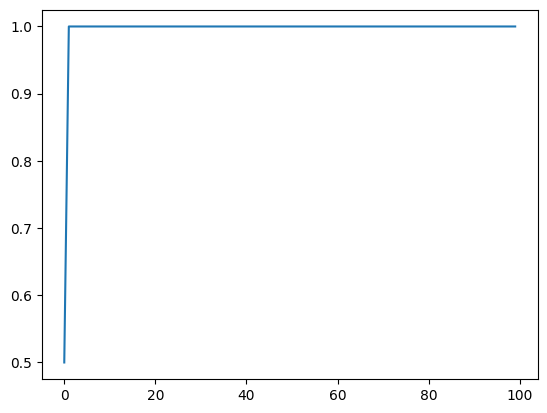

In [74]:
plot_graphs(history, 'accuracy')

KeyError: 'val_loss'

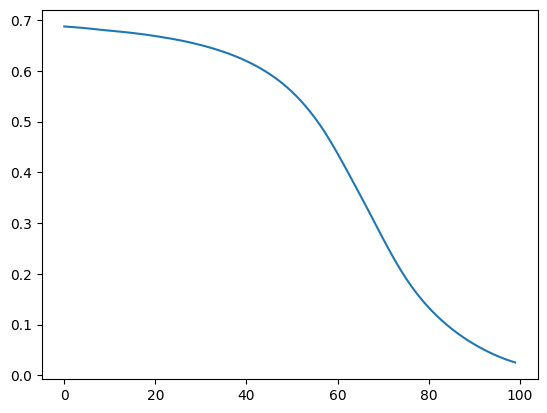

In [75]:
plot_graphs(history, 'loss')